In [9]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import Imputer

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()

In [10]:
from sklearn.preprocessing import Imputer

train_df = pd.read_csv("development_dataset.csv",index_col=0)
leader_df = pd.read_csv("leaderboard_dataset.csv",index_col=0)
evaluation_df = pd.read_csv("Evaluation_dataset.csv",index_col=0)


In [3]:
train_df.head(10)


,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,VAR8,VAR9,VAR10,VAR11,VAR12,VAR13,VAR14,VAR15,VAR16,VAR17,VAR18,VAR19,VAR20,VAR21
VAR1,,,,,,,,,,,,,,,,,,,,
1,828.235294,0.138889,321.428571,625.911006,1.818182,1.081550,198.113469,NaN,58.632548,0.279273,100.083403,1.000000,1,1.000000,1.540594,NaN,1,0,100.104991,Low
2,911.764706,0.027778,NaN,611.574748,8.181818,1.344479,198.600020,22.086661,NaN,NaN,15.012510,NaN,1,NaN,1.614613,NaN,0,1,146.654045,High
3,962.352941,0.833333,35.714286,615.825381,8.181818,0.720796,197.267767,NaN,58.632548,0.453212,210.175146,10.000000,1,10.000000,1.044599,NaN,0,0,98.249570,Medium
4,892.941177,NaN,NaN,638.076431,9.090909,0.820218,197.355744,4.363431,58.632548,NaN,NaN,NaN,1,NaN,1.145729,NaN,1,0,140.862306,Low
5,914.117647,0.083333,NaN,626.514988,5.181818,1.372928,198.790477,85.938202,58.632548,NaN,210.175146,NaN,.,NaN,1.558341,NaN,1,0,101.268503,High
6,794.117647,0.117700,178.571429,624.065797,12.727273,0.665458,197.251700,107.066619,58.632548,0.139290,NaN,2.000000,1,2.000000,1.037051,34.83,0,0,379.736661,Low
7,987.058823,NaN,35.714286,611.574748,NaN,0.970320,197.831747,22.086661,NaN,3.446909,NaN,NaN,1,6.000000,1.161463,1000.00,0,1,146.382100,Low
8,921.176471,0.138889,NaN,612.660165,18.181818,0.585291,196.956773,71.123926,58.632548,0.905039,80.066722,5.133333,1,5.133333,0.975338,894.33,1,0,103.776248,Medium
9,947.058823,NaN,821.428571,648.330121,23.636364,0.782048,200.301604,NaN,58.632548,2.886284,20.016681,9.733333,1,11.000000,1.141355,1000.00,1,0,96.337349,Low


In [11]:
train_df.isnull().sum()/340

VAR2      2.826471
VAR3      9.955882
VAR4     36.747059
VAR5      0.002941
VAR6     10.279412
VAR7      2.455882
VAR8      2.455882
VAR9     46.520588
VAR10    13.382353
VAR11    22.250000
VAR12    30.888235
VAR13    25.064706
VAR14     0.000000
VAR15    23.600000
VAR16     2.547059
VAR17    65.276471
VAR18     0.000000
VAR19     0.000000
VAR20     0.000000
VAR21     0.000000
dtype: float64

In [5]:
train_df.dtypes

VAR2     float64
VAR3     float64
VAR4     float64
VAR5     float64
VAR6     float64
VAR7     float64
VAR8     float64
VAR9     float64
VAR10    float64
VAR11    float64
VAR12    float64
VAR13    float64
VAR14     object
VAR15    float64
VAR16    float64
VAR17    float64
VAR18      int64
VAR19      int64
VAR20    float64
VAR21     object
dtype: object

In [12]:
train_df = train_df.replace('.', 'nan')
train_df['VAR14'] = train_df['VAR14'].astype(float)

In [92]:
train_df.dtypes

VAR2     float64
VAR3     float64
VAR4     float64
VAR5     float64
VAR6     float64
VAR7     float64
VAR8     float64
VAR9     float64
VAR10    float64
VAR11    float64
VAR12    float64
VAR13    float64
VAR14    float64
VAR15    float64
VAR16    float64
VAR17    float64
VAR18      int64
VAR19      int64
VAR20    float64
VAR21     object
dtype: object

In [28]:
train_df2=train_df.loc[:,:'VAR20']
train_df2['source']='train_df2'
leader_df['source']='leader_df'
evaluation_df['source']='evaluation_df'
data1 = pd.concat([train_df2, leader_df ],ignore_index=True)
data1 = pd.concat([data1, evaluation_df ],ignore_index=True)
data1 = data1.replace('.', 'nan')

data1['VAR14'] = data1['VAR14'].astype(float)

import sys
from impyute.imputation.cs import fast_knn
#data = train_df.loc[:,:'VAR20']
# start the KNN training
imputed_training=fast_knn(data1.loc[:, :'VAR20'].values, k=5)

imputed_saved=imputed_training


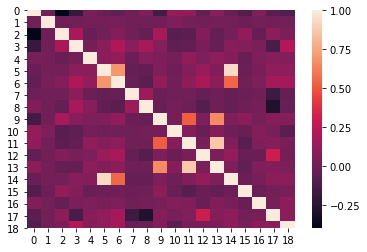

In [29]:
imputed_training=pd.DataFrame(imputed_training)
corr = imputed_training.corr()
#import seaborn as sns
sns.heatmap(corr)

#data = train_df.loc[:,:'VAR20']



In [38]:
imputed_training

,0,1,2,3,4,6,7,8,9,10,12,13,14,15,16,17,18
0,828.235294,0.138889,321.428571,625.911006,1.818182,198.113469,54.142628,58.632548,0.279273,100.083403,1.000000,1.000000,1.540594,820.136775,1.0,0.0,100.104991
1,911.764706,0.027778,247.070921,611.574748,8.181818,198.600020,22.086661,56.802571,4.706554,15.012510,1.000000,12.684988,1.614613,820.136775,0.0,1.0,146.654045
2,962.352941,0.833333,35.714286,615.825381,8.181818,197.267767,54.777565,58.632548,0.453212,210.175146,1.000000,10.000000,1.044599,820.136775,0.0,0.0,98.249570
3,892.941177,0.893821,247.070921,638.076431,9.090909,197.355744,4.363431,58.632548,5.424166,116.998948,1.000000,12.509678,1.145729,820.136775,1.0,0.0,140.862306
4,914.117647,0.083333,248.287889,626.514988,5.181818,198.790477,85.938202,58.632548,2.877702,210.175146,1.830956,11.408517,1.558341,820.136775,1.0,0.0,101.268503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53995,961.176471,0.055556,247.070921,617.241675,9.878793,197.148867,32.832680,58.632548,0.614678,116.998948,1.000000,0.333333,0.998794,820.136775,0.0,0.0,107.493976
53996,823.529412,0.493867,247.070921,611.574748,50.000000,198.066831,22.086661,56.928321,5.424166,116.998948,1.000000,12.509678,0.970848,820.136775,0.0,1.0,170.817556
53997,931.764706,0.027778,35.714286,611.574748,2.272727,198.660971,22.086661,49.793908,0.246010,15.012510,0.000000,5.600000,1.328066,820.136775,0.0,1.0,114.246127
53998,1000.000000,0.033333,35.714286,611.574748,9.090909,197.223243,0.924021,58.331180,0.503800,116.998948,1.000000,7.266667,1.075421,820.136775,0.0,1.0,117.898451


In [31]:
imputed_training.drop([5,11], inplace = True, axis=1)
#data.columns
#data1.head()

In [41]:
imputed_training

,0,1,2,3,4,6,7,8,9,10,12,13,14,15,16,17,18
0,828.235294,0.138889,321.428571,625.911006,1.818182,198.113469,54.142628,58.632548,0.279273,100.083403,1.000000,1.000000,1.540594,820.136775,1.0,0.0,100.104991
1,911.764706,0.027778,247.070921,611.574748,8.181818,198.600020,22.086661,56.802571,4.706554,15.012510,1.000000,12.684988,1.614613,820.136775,0.0,1.0,146.654045
2,962.352941,0.833333,35.714286,615.825381,8.181818,197.267767,54.777565,58.632548,0.453212,210.175146,1.000000,10.000000,1.044599,820.136775,0.0,0.0,98.249570
3,892.941177,0.893821,247.070921,638.076431,9.090909,197.355744,4.363431,58.632548,5.424166,116.998948,1.000000,12.509678,1.145729,820.136775,1.0,0.0,140.862306
4,914.117647,0.083333,248.287889,626.514988,5.181818,198.790477,85.938202,58.632548,2.877702,210.175146,1.830956,11.408517,1.558341,820.136775,1.0,0.0,101.268503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53995,961.176471,0.055556,247.070921,617.241675,9.878793,197.148867,32.832680,58.632548,0.614678,116.998948,1.000000,0.333333,0.998794,820.136775,0.0,0.0,107.493976
53996,823.529412,0.493867,247.070921,611.574748,50.000000,198.066831,22.086661,56.928321,5.424166,116.998948,1.000000,12.509678,0.970848,820.136775,0.0,1.0,170.817556
53997,931.764706,0.027778,35.714286,611.574748,2.272727,198.660971,22.086661,49.793908,0.246010,15.012510,0.000000,5.600000,1.328066,820.136775,0.0,1.0,114.246127
53998,1000.000000,0.033333,35.714286,611.574748,9.090909,197.223243,0.924021,58.331180,0.503800,116.998948,1.000000,7.266667,1.075421,820.136775,0.0,1.0,117.898451


In [42]:
imputed_training["source"] = data1["source"]

In [49]:
imputed_training.head(44003)

,0,1,2,3,4,6,7,8,9,10,12,13,14,15,16,17,18,source
0,828.235294,0.138889,321.428571,625.911006,1.818182,198.113469,54.142628,58.632548,0.279273,100.083403,1.000000,1.000000,1.540594,820.136775,1.0,0.0,100.104991,train_df2
1,911.764706,0.027778,247.070921,611.574748,8.181818,198.600020,22.086661,56.802571,4.706554,15.012510,1.000000,12.684988,1.614613,820.136775,0.0,1.0,146.654045,train_df2
2,962.352941,0.833333,35.714286,615.825381,8.181818,197.267767,54.777565,58.632548,0.453212,210.175146,1.000000,10.000000,1.044599,820.136775,0.0,0.0,98.249570,train_df2
3,892.941177,0.893821,247.070921,638.076431,9.090909,197.355744,4.363431,58.632548,5.424166,116.998948,1.000000,12.509678,1.145729,820.136775,1.0,0.0,140.862306,train_df2
4,914.117647,0.083333,248.287889,626.514988,5.181818,198.790477,85.938202,58.632548,2.877702,210.175146,1.830956,11.408517,1.558341,820.136775,1.0,0.0,101.268503,train_df2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43998,938.823529,0.166667,247.070921,615.121611,11.363636,198.119869,0.799962,50.541044,0.183641,40.033361,3.000000,10.000000,1.508269,820.136775,1.0,1.0,125.161790,leader_df
43999,995.294118,0.421029,247.853586,612.884251,3.636364,197.078829,46.962240,58.632548,1.509322,300.250208,2.000000,16.666667,1.034153,996.330000,1.0,0.0,102.845095,leader_df
44000,984.705882,0.005556,35.714286,611.574748,3.454545,196.911295,22.086661,47.899686,0.126123,117.685673,1.000000,6.666667,0.959315,820.136775,0.0,1.0,99.032702,evaluation_df
44001,815.294118,0.333333,392.857143,638.878239,9.090909,199.830468,54.142628,58.632548,1.192628,50.041701,1.000000,10.000000,1.949250,820.136775,1.0,0.0,82.507745,evaluation_df


In [187]:
train_seg = imputed_training.iloc[:34000,:]
leaderboard_seg = imputed_training.iloc[34000:44000,:]
evaluation_seg = imputed_training.iloc[44000:,:]
#imputed_training.drop(["source"],inplace = True , axis = 1)

In [89]:
train_seg

,0,1,2,3,4,6,7,8,9,10,12,13,14,15,16,17,18
0,828.235294,0.138889,321.428571,625.911006,1.818182,198.113469,54.142628,58.632548,0.279273,100.083403,1.000000,1.000000,1.540594,820.136775,1.0,0.0,100.104991
1,911.764706,0.027778,247.070921,611.574748,8.181818,198.600020,22.086661,56.802571,4.706554,15.012510,1.000000,12.684988,1.614613,820.136775,0.0,1.0,146.654045
2,962.352941,0.833333,35.714286,615.825381,8.181818,197.267767,54.777565,58.632548,0.453212,210.175146,1.000000,10.000000,1.044599,820.136775,0.0,0.0,98.249570
3,892.941177,0.893821,247.070921,638.076431,9.090909,197.355744,4.363431,58.632548,5.424166,116.998948,1.000000,12.509678,1.145729,820.136775,1.0,0.0,140.862306
4,914.117647,0.083333,248.287889,626.514988,5.181818,198.790477,85.938202,58.632548,2.877702,210.175146,1.830956,11.408517,1.558341,820.136775,1.0,0.0,101.268503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33995,996.470588,0.833333,247.070921,611.574748,9.090909,199.590730,1.907932,57.227776,1.837104,250.208507,1.000000,13.333333,1.913514,820.136775,1.0,1.0,155.080895
33996,885.882353,1.164197,247.070921,617.448254,22.727273,197.743579,4.902443,58.632548,5.424166,5.004170,1.000000,12.509678,1.014169,820.136775,0.0,0.0,162.972461
33997,976.470588,0.166667,35.714286,621.613105,18.181818,197.437342,58.431835,58.632548,1.172531,130.108424,1.000000,12.666667,1.228365,367.020000,0.0,0.0,108.767642
33998,785.882353,0.177233,1000.000000,682.762351,6.923859,198.254389,9.359987,58.632548,8.072586,18.348624,1.000000,11.866667,0.976599,1000.000000,0.0,0.0,101.471601


In [62]:
train_seg.to_csv(r'C:\Users\ANIMESH TIWARI\Desktop\train_seg.csv')
leaderboard_seg.to_csv(r'C:\Users\ANIMESH TIWARI\Desktop\leaderboard_seg.csv')
evaluation_seg.to_csv(r'C:\Users\ANIMESH TIWARI\Desktop\evaluation_seg.csv')

In [226]:

from numpy import loadtxt
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()    
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_seg = pd.DataFrame(train_seg)
#train_seg.drop(["source"], inplace = True , axis = 1)
train_seg.loc[:, :] = scaler.fit_transform(train_seg.loc[:, :])

# split into input (X) and output (y) variables
train_seg = pd.DataFrame(train_seg)
X = train_seg.iloc[:,:]
y = train_df.iloc[:,19]
y = lb.fit_transform(y)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state = 2)



In [203]:
y_train.shape

(28900,)

In [116]:
conda install -c conda-forge lightgbm

Solving environment: ...working... done

## Package Plan ##

  environment location: D:\Anaconda3

  added / updated specs:
    - lightgbm


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2019.9.11  |       hecc5488_0         181 KB  conda-forge
    conda-4.7.12               |           py37_0         3.0 MB  conda-forge
    joblib-0.14.0              |             py_0         197 KB  conda-forge
    libblas-3.8.0              |           12_mkl         3.5 MB  conda-forge
    libcblas-3.8.0             |           12_mkl         3.5 MB  conda-forge
    lightgbm-2.3.0             |   py37h6538335_0         553 KB  conda-forge
    openssl-1.1.1c             |       hfa6e2cd_0         4.7 MB  conda-forge
    scikit-learn-0.21.3        |   py37h7208079_0         5.7 MB  conda-forge
    ------------------------------------------------------------
                          

In [204]:
y_train


array([2, 2, 1, ..., 0, 1, 1])

In [220]:
from sklearn import datasets
from sklearn import metrics
from lightgbm import LGBMClassifier
dataset = datasets.load_wine()
x_seg = dataset.data; y2 = dataset.target
model = LGBMClassifier()
model.fit(x_train, y_train)
print(); print(model)

    # make predictions
expected_y  = y_test
predicted_y = model.predict(x_test)
    
    # summarize the fit of the model
print(); print('LightGBM: ')
print(); print(metrics.classification_report(expected_y, predicted_y, target_names=dataset.target_names))



LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

LightGBM: 

              precision    recall  f1-score   support

     class_0       0.52      0.05      0.09       590
     class_1       0.54      0.33      0.41      1970
     class_2       0.57      0.83      0.68      2880

    accuracy                           0.57      5440
   macro avg       0.54      0.40      0.39      5440
weighted avg       0.56      0.57      0.52      5440



In [193]:
y_test

array([1, 2, 0, ..., 2, 2, 1])

In [225]:
for j in range(50, 500, 25):
        print(i, j)
        model = LGBMClassifier(boosting_type = 'dart', learning_rate=0.3, num_leaves=50, n_estimators=50)
        model.fit(x_train, y_train)
        print(); print(model)

    # make predictions
        expected_y  = y_test
        predicted_y = model.predict(x_test)
    
    # summarize the fit of the model
        print(); print('LightGBM: ')
        print(); print(metrics.classification_report(expected_y, predicted_y, target_names=dataset.target_names))

0.6 50

LGBMClassifier(boosting_type='dart', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.3, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=50, n_jobs=-1, num_leaves=50, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

LightGBM: 

              precision    recall  f1-score   support

     class_0       0.46      0.06      0.11       590
     class_1       0.54      0.34      0.42      1970
     class_2       0.57      0.82      0.68      2880

    accuracy                           0.57      5440
   macro avg       0.52      0.41      0.40      5440
weighted avg       0.55      0.57      0.52      5440

0.6 75

LGBMClassifier(boosting_type='dart', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=

In [178]:
y_pred


array([[8.49279372e-16, 6.70262110e-02, 2.52198588e-01, 6.80775201e-01],
       [8.63188405e-16, 1.30552932e-01, 2.65740430e-01, 6.03706638e-01],
       [5.50538786e-16, 6.94717257e-01, 1.40843092e-02, 2.91198433e-01],
       ...,
       [1.01012073e-15, 1.83144980e-01, 2.76931166e-01, 5.39923853e-01],
       [9.29103407e-16, 2.36481325e-01, 1.98747492e-01, 5.64771184e-01],
       [1.20743469e-15, 1.55136511e-01, 2.39644971e-01, 6.05218518e-01]])

In [84]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y2, test_size=0.2, random_state = 2)
# define the keras model
model = Sequential()
model.add(Dense(256, input_dim=17, activation='relu'))
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(3, activation='softmax'))
# compile the keras model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
model.fit(x_train, y_train, epochs=10, batch_size=16)
#evaluate the keras model
ass1=model.predict(x_test)
_, accuracy = model.evaluate(x_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))



Epoch 1/10
27200/27200 [==============================] - ETA: 6:39 - loss: 1.6531 - accuracy: 0.06 - ETA: 26s - loss: 1.1784 - accuracy: 0.3229 - ETA: 16s - loss: 1.0798 - accuracy: 0.421 - ETA: 14s - loss: 1.0479 - accuracy: 0.433 - ETA: 11s - loss: 1.0163 - accuracy: 0.456 - ETA: 9s - loss: 0.9966 - accuracy: 0.469 - ETA: 8s - loss: 0.9852 - accuracy: 0.48 - ETA: 8s - loss: 0.9751 - accuracy: 0.50 - ETA: 7s - loss: 0.9744 - accuracy: 0.50 - ETA: 7s - loss: 0.9692 - accuracy: 0.51 - ETA: 6s - loss: 0.9726 - accuracy: 0.51 - ETA: 6s - loss: 0.9736 - accuracy: 0.51 - ETA: 6s - loss: 0.9668 - accuracy: 0.51 - ETA: 6s - loss: 0.9644 - accuracy: 0.52 - ETA: 5s - loss: 0.9600 - accuracy: 0.52 - ETA: 5s - loss: 0.9585 - accuracy: 0.52 - ETA: 5s - loss: 0.9570 - accuracy: 0.52 - ETA: 5s - loss: 0.9565 - accuracy: 0.53 - ETA: 5s - loss: 0.9541 - accuracy: 0.53 - ETA: 4s - loss: 0.9523 - accuracy: 0.53 - ETA: 4s - loss: 0.9512 - accuracy: 0.53 - ETA: 4s - loss: 0.9483 - accuracy: 0.53 - ETA: 4

Epoch 3/10
27200/27200 [==============================] - ETA: 6s - loss: 1.0071 - accuracy: 0.56 - ETA: 5s - loss: 0.8758 - accuracy: 0.61 - ETA: 5s - loss: 0.8838 - accuracy: 0.58 - ETA: 5s - loss: 0.9027 - accuracy: 0.57 - ETA: 4s - loss: 0.9086 - accuracy: 0.57 - ETA: 4s - loss: 0.9137 - accuracy: 0.56 - ETA: 4s - loss: 0.9079 - accuracy: 0.56 - ETA: 4s - loss: 0.9059 - accuracy: 0.57 - ETA: 4s - loss: 0.9048 - accuracy: 0.57 - ETA: 4s - loss: 0.9127 - accuracy: 0.56 - ETA: 4s - loss: 0.9113 - accuracy: 0.56 - ETA: 4s - loss: 0.9133 - accuracy: 0.56 - ETA: 3s - loss: 0.9075 - accuracy: 0.56 - ETA: 3s - loss: 0.9072 - accuracy: 0.56 - ETA: 3s - loss: 0.9079 - accuracy: 0.56 - ETA: 3s - loss: 0.9081 - accuracy: 0.56 - ETA: 3s - loss: 0.9072 - accuracy: 0.56 - ETA: 3s - loss: 0.9102 - accuracy: 0.56 - ETA: 3s - loss: 0.9139 - accuracy: 0.56 - ETA: 3s - loss: 0.9151 - accuracy: 0.56 - ETA: 3s - loss: 0.9152 - accuracy: 0.56 - ETA: 3s - loss: 0.9136 - accuracy: 0.56 - ETA: 3s - loss: 0.

27200/27200 [==============================] - ETA: 10s - loss: 0.8517 - accuracy: 0.625 - ETA: 7s - loss: 0.8626 - accuracy: 0.572 - ETA: 6s - loss: 0.8488 - accuracy: 0.58 - ETA: 6s - loss: 0.8740 - accuracy: 0.57 - ETA: 5s - loss: 0.8674 - accuracy: 0.58 - ETA: 5s - loss: 0.8689 - accuracy: 0.57 - ETA: 5s - loss: 0.8698 - accuracy: 0.58 - ETA: 5s - loss: 0.8746 - accuracy: 0.58 - ETA: 4s - loss: 0.8804 - accuracy: 0.57 - ETA: 4s - loss: 0.8801 - accuracy: 0.57 - ETA: 4s - loss: 0.8776 - accuracy: 0.57 - ETA: 4s - loss: 0.8758 - accuracy: 0.57 - ETA: 4s - loss: 0.8741 - accuracy: 0.57 - ETA: 4s - loss: 0.8722 - accuracy: 0.57 - ETA: 3s - loss: 0.8751 - accuracy: 0.57 - ETA: 3s - loss: 0.8764 - accuracy: 0.57 - ETA: 3s - loss: 0.8773 - accuracy: 0.57 - ETA: 3s - loss: 0.8766 - accuracy: 0.57 - ETA: 3s - loss: 0.8793 - accuracy: 0.57 - ETA: 3s - loss: 0.8797 - accuracy: 0.57 - ETA: 3s - loss: 0.8792 - accuracy: 0.57 - ETA: 3s - loss: 0.8839 - accuracy: 0.57 - ETA: 3s - loss: 0.8853 - a

27200/27200 [==============================] - ETA: 8s - loss: 0.8967 - accuracy: 0.56 - ETA: 7s - loss: 0.9296 - accuracy: 0.54 - ETA: 6s - loss: 0.9197 - accuracy: 0.53 - ETA: 5s - loss: 0.9111 - accuracy: 0.55 - ETA: 5s - loss: 0.9082 - accuracy: 0.55 - ETA: 5s - loss: 0.9004 - accuracy: 0.56 - ETA: 5s - loss: 0.8945 - accuracy: 0.56 - ETA: 6s - loss: 0.9011 - accuracy: 0.56 - ETA: 6s - loss: 0.8982 - accuracy: 0.56 - ETA: 7s - loss: 0.8980 - accuracy: 0.56 - ETA: 7s - loss: 0.8998 - accuracy: 0.56 - ETA: 7s - loss: 0.8984 - accuracy: 0.55 - ETA: 7s - loss: 0.8943 - accuracy: 0.56 - ETA: 7s - loss: 0.8904 - accuracy: 0.56 - ETA: 7s - loss: 0.8910 - accuracy: 0.56 - ETA: 7s - loss: 0.8836 - accuracy: 0.56 - ETA: 7s - loss: 0.8812 - accuracy: 0.57 - ETA: 8s - loss: 0.8804 - accuracy: 0.57 - ETA: 8s - loss: 0.8778 - accuracy: 0.57 - ETA: 8s - loss: 0.8798 - accuracy: 0.57 - ETA: 8s - loss: 0.8763 - accuracy: 0.57 - ETA: 8s - loss: 0.8783 - accuracy: 0.57 - ETA: 8s - loss: 0.8816 - accu

6800/6800 [==============================] - ETA: 22 - ETA: 0 - ETA:  - ETA:  - ETA:  - 0s 53us/step
Accuracy: 56.53


6800/6800 [==============================] - ETA:  - ETA:  - ETA:  - ETA:  - 0s 30us/step
Accuracy: 54.10
